The data frame has been created from combining SQL sakila film dataset sakila and visualising it with python's libraries( pandas, matplotlib, seaborn)*. The results shown are of *the top 5 most rented films* in this dataset.

In [175]:
import pymysql

In [176]:
from sqlalchemy import create_engine

In [177]:
import pandas as pd

In [178]:
connection_string = 'mysql+pymysql://root:' + 'bmw5JKsave$' + '@localhost/sakila'
engine= create_engine(connection_string)

In [179]:
#dataframe creation
df= pd.read_sql_query('Select * from sakila.film', engine)

In [180]:
df

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,YOUNG LANGUAGE,A Unbelieveable Yarn of a Boat And a Database ...,2006,1,None,6,0.99,183,9.99,G,"Trailers,Behind the Scenes",2006-02-15 05:03:42
996,997,YOUTH KICK,A Touching Drama of a Teacher And a Cat who mu...,2006,1,None,4,0.99,179,14.99,NC-17,"Trailers,Behind the Scenes",2006-02-15 05:03:42
997,998,ZHIVAGO CORE,A Fateful Yarn of a Composer And a Man who mus...,2006,1,None,6,0.99,105,10.99,NC-17,Deleted Scenes,2006-02-15 05:03:42
998,999,ZOOLANDER FICTION,A Fateful Reflection of a Waitress And a Boat ...,2006,1,None,5,2.99,101,28.99,R,"Trailers,Deleted Scenes",2006-02-15 05:03:42


In [181]:
Ffilms=pd.read_sql_query('SELECT MONTHNAME(r.rental_date), c.name, count(r.rental_id),SUM(count(r.rental_id)) over(PARTITION BY MONTHNAME(r.rental_date)) as rental_month_total, count(rental_id) / SUM(count(r.rental_id)) over(PARTITION BY MONTHNAME(r.rental_date)) * 100 as percentage_of_rentals FROM rental r LEFT JOIN film f ON f.film_id = r.inventory_id LEFT JOIN film_category fc ON fc.film_id = f.film_id LEFT JOIN category c ON c.category_id = fc.category_id GROUP BY MONTHNAME(r.rental_date),c.name;',engine)


In [182]:
Ffilms

,MONTHNAME(r.rental_date),name,count(r.rental_id),rental_month_total,percentage_of_rentals
0,August,None,4434,5686.0,77.9810
1,August,Documentary,87,5686.0,1.5301
2,August,New,76,5686.0,1.3366
3,August,Sports,91,5686.0,1.6004
4,August,Drama,80,5686.0,1.4070
...,...,...,...,...,...
78,May,Action,15,1156.0,1.2976
79,May,Travel,20,1156.0,1.7301
80,May,New,10,1156.0,0.8651
81,May,Games,11,1156.0,0.9516


In [183]:
Ffilms=pd.read_sql_query('SELECT film_id, title, count(film_id) As times_rented FROM rental AS r JOIN inventory AS i USING(inventory_id) JOIN film AS fl USING(film_id) GROUP BY film_id ORDER BY times_rented DESC limit 8', engine)

In [184]:
Ffilms.head()

,film_id,title,times_rented
0,103,BUCKET BROTHERHOOD,34
1,738,ROCKETEER MOTHER,33
2,489,JUGGLER HARDLY,32
3,331,FORWARD TEMPLE,32
4,767,SCALAWAG DUCK,32


In [185]:
Ffilms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   film_id       8 non-null      int64 
 1   title         8 non-null      object
 2   times_rented  8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [186]:
#Visualisation
import matplotlib as plt
import seaborn as sns

In [187]:
# What are the top most rented Films?

<AxesSubplot:>

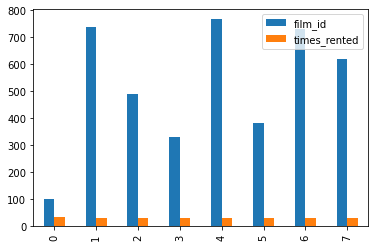

In [188]:
# Displaying the ranges for the sakila most rented films.
plotdata= Ffilms
plotdata.plot(kind="bar")


In [189]:
# whats the relationship between no of films rented, rental rate? 

<AxesSubplot:xlabel='times_rented', ylabel='title'>

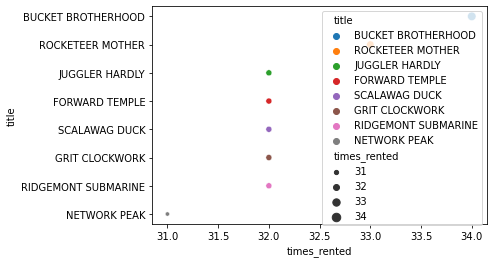

In [190]:

sns.scatterplot(x='times_rented', y= 'title', hue ='title', size = 'times_rented', legend = 2, data = Ffilms)

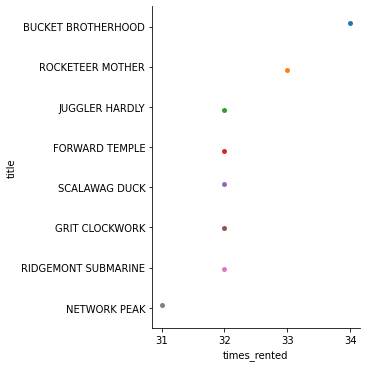

In [191]:
sns.catplot(x="times_rented", y="title", data=Ffilms)

In [192]:
# What are the Eight most rented films? 

In [193]:
import matplotlib as plt
%matplotlib inline
import seaborn as sns

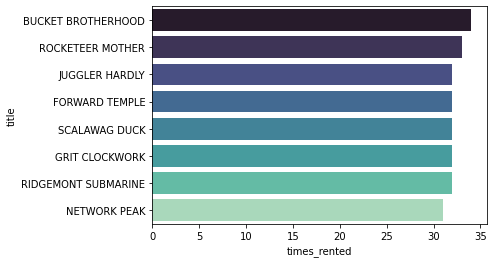

In [194]:
sns_plot = sns.barplot(y='title',x ='times_rented', data = Ffilms, palette ="mako", order=Ffilms.sort_values('times_rented', ascending = False).title)

In [195]:
# Exporting the PyMySQL L to a cvs file.

In [197]:
Ffilms.to_csv('Sql_Jupyter_films.csv')